In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer


import pickle
import warnings 
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv(r"E:\Downloads\new data (1).csv")
df

,URLs,Labels
0,"https://cdn.substack.com/image/fetch/c_limit,f...",True
1,https://numlock.substack.com/subscribe,True
2,https://docs.google.com/forms/d/e/1FAIpQLSfDLO...,True
3,https://bookclub.substack.com/,True
4,https://awards.substack.com/,True
...,...,...
1057,https://bry.qmsiuas.net/,False
1058,https://guidelinesenforcementengageamplify.ver...,False
1059,https://guidelinesenforcementengageamplify.ver...,False
1060,https://opg.qmsiuas.net/,False


In [3]:
df.columns

Index(['URLs', 'Labels'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   URLs    1062 non-null   object
 1   Labels  1062 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 9.5+ KB


In [5]:
df.size

2124

In [6]:
df.shape

(1062, 2)

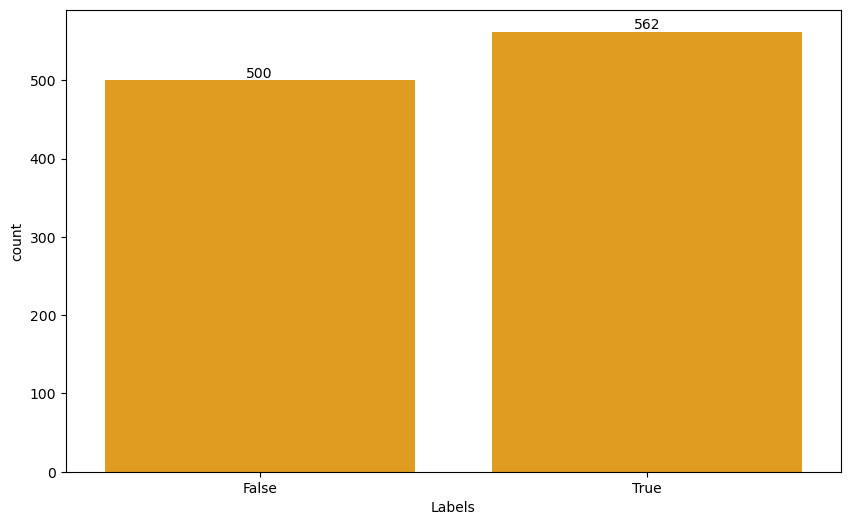

In [7]:
fig,ax = plt.subplots(figsize=(10,6))
sns.countplot(x='Labels',data  = df,ax = ax, color='orange')
for i in ax.containers:
    ax.bar_label(i)


In [8]:
x = df['URLs']
y = df['Labels']

In [9]:
encoder = LabelEncoder()
df['Label']=encoder.fit_transform(df['Labels'])
df['Label']

0       1
1       1
2       1
3       1
4       1
       ..
1057    0
1058    0
1059    0
1060    0
1061    0
Name: Label, Length: 1062, dtype: int64

In [10]:
x

0       https://cdn.substack.com/image/fetch/c_limit,f...
1                  https://numlock.substack.com/subscribe
2       https://docs.google.com/forms/d/e/1FAIpQLSfDLO...
3                          https://bookclub.substack.com/
4                            https://awards.substack.com/
                              ...                        
1057                             https://bry.qmsiuas.net/
1058    https://guidelinesenforcementengageamplify.ver...
1059    https://guidelinesenforcementengageamplify.ver...
1060                             https://opg.qmsiuas.net/
1061    https://postinfractionsmartcampaigns.vercel.ap...
Name: URLs, Length: 1062, dtype: object

In [11]:
y

0        True
1        True
2        True
3        True
4        True
        ...  
1057    False
1058    False
1059    False
1060    False
1061    False
Name: Labels, Length: 1062, dtype: bool

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [13]:
cv = CountVectorizer()

In [14]:
 X_train_counts = cv.fit_transform(x_train)
 tfidf_transformer = TfidfTransformer()
 X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [15]:
x_train_cv = cv.fit_transform(x_train)
x_test_cv = cv.transform(x_test)

In [16]:
lr = LogisticRegression()

In [17]:
model=lr.fit(x_train_cv,y_train)
prediction_train = lr.predict(x_train_cv)

In [18]:
print(accuracy_score(y_train,prediction_train)*100)

98.53403141361257


In [19]:
prediction_test = lr.predict(x_test_cv)

In [20]:
print(accuracy_score(y_test,prediction_test)*100)

96.26168224299066


In [21]:
input_url = ["https://www.youtube.com/"]

# Convert text into feature vectors
input_url_features = cv.transform(input_url)  # Use 'cv' (CountVectorizer)


# Predict using the trained model
prediction = model.predict(input_url_features)[0]  

# Output result
if prediction == 1:
    print("TRUE")
else:
    print("FALSE")

TRUE


In [22]:
# import joblib

# # Save trained model
# joblib.dump(lr, "URL1.pickle")

# # Save CountVectorizer
# joblib.dump(cv, "count_vectorizer_1.pickle")

# print("Model & Vectorizer saved successfully!")


In [23]:
import joblib

# Save trained model
joblib.dump(lr, "URL3.pickle")

# Save CountVectorizer
joblib.dump(cv, "count_vectorizer_2.pickle")

print("Model & Vectorizer saved successfully!")


Model & Vectorizer saved successfully!
